In [1]:
from scipy import optimize

In [2]:
import cvxopt

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import sympy

In [6]:
sympy.init_printing()

# 单变量优化 Univariate Optimization

In [7]:
#变量为r、h
r,h = sympy.symbols("r, h")

In [8]:
#目标函数为圆柱体表面积
Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h

In [9]:
#圆柱体体积
Volume = sympy.pi * r**2 * h

In [10]:
#等式约约束条件为圆柱体体积为1
h_r = sympy.solve(Volume - 1)[0]

In [11]:
Area_r = Area.subs(h_r)

In [12]:
rsol = sympy.solve(Area_r.diff(r))[0]

In [13]:
 rsol

In [14]:
_.evalf()

In [15]:
# 再验证二阶导数为正且rsol对应最小值
Area_r.diff(r, 2).subs(r, rsol)

In [16]:
Area_r.subs(r, rsol)

In [17]:
_.evalf()

In [18]:
#h用r表示，将目标函数转化为一维变量函数
#首先定义一个Python函数f作为目标函数。将f传给optimize.brent，参数brack表示指定算法的开始区间。
def f(r):
     return 2 * np.pi * r**2 + 2 / r

In [19]:
 r_min = optimize.brent(f, brack=(0.1, 4))

In [20]:
 r_min

In [21]:
f(r_min)

In [22]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

# 无约束多变量优化

In [23]:
x1, x2 = sympy.symbols("x_1, x_2")

In [24]:
f_sym = (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2

In [25]:
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]

In [26]:
# 梯度Gradient
sympy.Matrix(fprime_sym)        

⎡                  3⎤
⎢-2⋅x₂ + 4⋅(x₁ - 1) ⎥
⎢                   ⎥
⎣-2⋅x₁ + 10⋅x₂ - 10 ⎦

In [27]:
 fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in 
(x1, x2)]

In [28]:
 # Hessian
sympy.Matrix(fhess_sym)

⎡           2    ⎤
⎢12⋅(x₁ - 1)   -2⎥
⎢                ⎥
⎣     -2       10⎦

In [29]:
f_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')

In [30]:
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')

In [31]:
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

In [32]:
def func_XY_to_X_Y(f):
    #Wrapper for f(X) -> f(X[0], X[1]) 
     return lambda X: np.array(f(X[0], X[1]))

In [33]:
f = func_XY_to_X_Y(f_lmbda)

In [34]:
fprime = func_XY_to_X_Y(fprime_lmbda)

In [35]:
fhess = func_XY_to_X_Y(fhess_lmbda)

In [36]:
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess) 

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 8


In [37]:
 x_opt

array([1.88292613, 1.37658523])

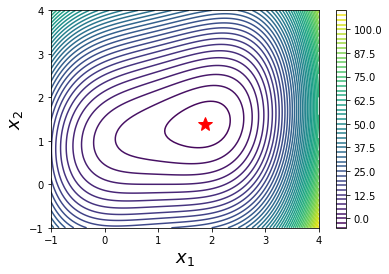

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [39]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


In [40]:
 x_opt

array([1.88292645, 1.37658596])

In [41]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


In [42]:
x_opt

array([1.88292612, 1.37658523])

In [43]:
x_opt = optimize.fmin_bfgs(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 39
         Gradient evaluations: 13


In [44]:
x_opt

array([1.88292644, 1.37658595])

In [45]:
def f(X):
         x, y = X
         return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) +  (x - 1)**2 + (y - 1)**2  

In [46]:
x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), finish=None)

In [47]:
 x_start

array([1.5, 1.5])

In [48]:
f(x_start)

In [49]:
 x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


In [50]:
x_opt

array([1.47586906, 1.48365787])

In [51]:
f(x_opt)

In [52]:
def func_X_Y_to_XY(f, X, Y): 
        #Wrapper for f(X, Y) -> f([X, Y]) 
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

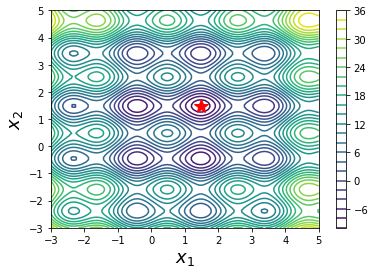

In [53]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [54]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


In [55]:
 result = optimize.minimize(f, x_start, method= 'BFGS')

In [56]:
 x_opt = result.x

# Nonlinear Least Square Problems

In [57]:
beta = (0.25, 0.75, 0.5)

In [58]:
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

In [59]:
xdata = np.linspace(0, 5, 50)

In [60]:
 y = f(xdata, *beta)

In [61]:
ydata = y + 0.05 * np.random.randn(len(xdata))

In [62]:
def g(beta):
    return ydata - f(xdata, *beta)

In [63]:
 beta_start = (1, 1, 1)

In [64]:
 beta_opt, beta_cov = optimize.leastsq(g, beta_start)

In [65]:
beta_opt

array([0.27412399, 0.70612911, 0.56851426])

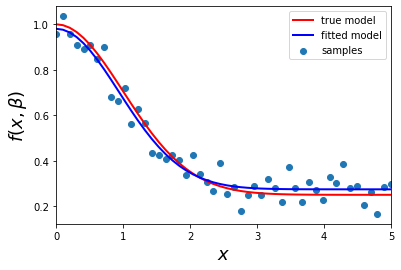

In [66]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()

In [67]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)

In [68]:
beta_opt

array([0.27412399, 0.70612911, 0.56851426])

# Constrained Optimization

In [69]:
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2 

In [70]:
x_opt = optimize.minimize(f, [1, 1], method='BFGS').x

In [71]:
bnd_x1, bnd_x2 = (2, 3), (0, 2)

In [72]:
x_cons_opt = optimize.minimize(f, [1, 1], method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x

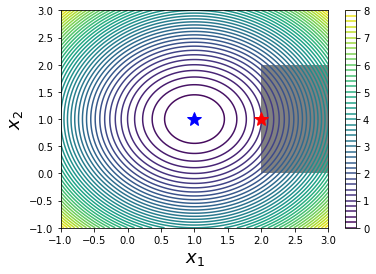

In [73]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]),
                            bnd_x1[1] - bnd_x1[0], bnd_x2[1] -  
                            bnd_x2[0], facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [74]:
x = x0, x1, x2, l = sympy.symbols("x_0, x_1, x_2, lambda")
f = x0 * x1 * x2
g = 2 * (x0 * x1 + x1 * x2 + x2 * x0) - 1
L = f + l * g

In [75]:
grad_L = [sympy.diff(L, x_) for x_ in x]
sols = sympy.solve(grad_L)
sols

In [76]:
 g.subs(sols[0])

In [77]:
f.subs(sols[0])

In [78]:
def f(X):
    return -X[0] * X[1] * X[2]

In [79]:
def g(X):
    return 2 * (X[0]*X[1] + X[1] * X[2] + X[2] * X[0]) - 1

In [80]:
constraint = dict(type='eq', fun=g)

In [81]:
result = optimize.minimize(f, [0.5, 1, 1.5], method='SLSQP', constraints=[constraint])
result

     fun: -0.06804136862287297
     jac: array([-0.16666925, -0.16666542, -0.16666526])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([0.40824188, 0.40825127, 0.40825165])

In [82]:
result.x

array([0.40824188, 0.40825127, 0.40825165])

In [83]:
def f(X):
    return (X[0] - 1)**2 + (X[1] - 1)**2

In [84]:
def g(X):
     return X[1] - 1.75 - (X[0] - 0.75)**4

In [85]:
 constraints = [dict(type='ineq', fun=g)]

In [86]:
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP', constraints=constraints).x

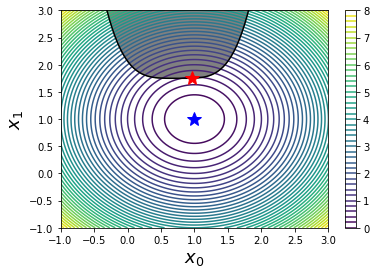

In [87]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color='grey')
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)

# Linear Programming

In [88]:
 c = np.array([-1.0, 2.0, -3.0])

In [89]:
A = np.array([[ 1.0, 1.0, 0.0],
                       [-1.0, 3.0, 0.0],
                       [ 0.0, -1.0, 1.0]])

In [90]:
b = np.array([1.0, 2.0, 3.0])
A_ = cvxopt.matrix(A)
b_ = cvxopt.matrix(b)
c_ = cvxopt.matrix(c)

In [94]:
sol = cvxopt.solvers.lp(c_, A_, b_)
sol

Optimal solution found.


{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 0.0,
 'relative gap': 0.0,
 'primal objective': -10.0,
 'dual objective': -10.0,
 'primal infeasibility': 0.0,
 'primal slack': -0.0,
 'dual slack': 2.7755575615628914e-17,
 'dual infeasibility': 2.967195843610875e-17,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 0}

In [95]:
x = np.array(sol['x'])
x

array([[0.25],
       [0.75],
       [3.75]])

In [96]:
sol['primal objective']